<a href="https://colab.research.google.com/github/csmsum/ml4ai/blob/main/Oct13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [17]:
fb = pd.read_csv(
    '/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05/data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05/data/earthquakes.csv')

#Task 1

In [9]:
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


Text(0.5, 1.0, 'fb close price')

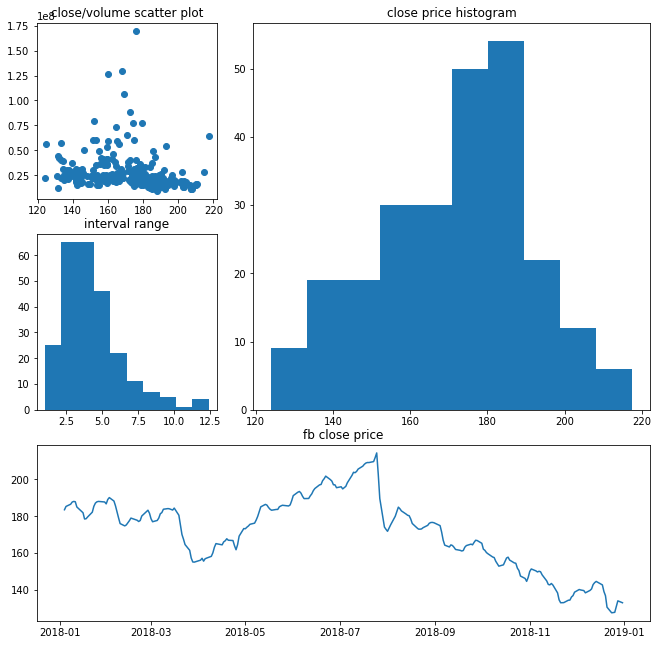

In [37]:
fig = plt.figure(figsize=(11, 11))
gs = fig.add_gridspec(3, 3)
top_left = fig.add_subplot(gs[0, 0])
top_left.scatter(fb.close, fb.volume)
top_left.set_title("close/volume scatter plot")
mid_left = fig.add_subplot(gs[1, 0])
mid_left.hist(fb.high-fb.low)
mid_left.set_title("interval range")
top_right = fig.add_subplot(gs[:2, 1:])
top_right.hist(fb.close)
top_right.set_title("close price histogram")
bottom = fig.add_subplot(gs[2,:])
bottom.plot(fb.close.rolling(3).mean())
bottom.set_title("fb close price")

#Task 2

In [68]:
covid = pd.read_csv('/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05/data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [69]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).rolling(7).mean()
new_cases_rolling_average.head(15)

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_Republic_of_Tanzania,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.285714,NaN,NaN,NaN,NaN
2020-01-25,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.285714,NaN,NaN,NaN,NaN
2020-01-26,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.285714,NaN,NaN,NaN,NaN


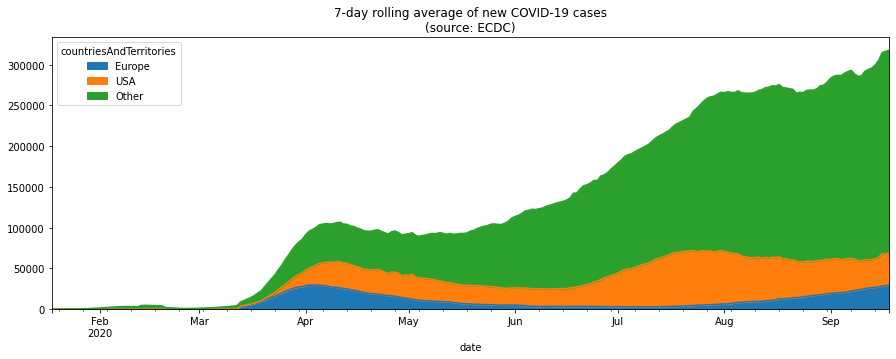

In [70]:
cols = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['USA', 'Europe']
]
new_cases_rolling_average.assign(
    **{'Europe': lambda x: x.United_Kingdom + x.France + x.Netherlands + x.Italy + x.Germany + x.Spain + x.Belgium + x.Portugal+x.Poland + x.Denmark + x.Norway}
).sort_index(axis=1).assign(
    Other=lambda x: x[cols].sum(axis=1)
).drop(columns=cols).plot(
    kind='area', figsize=(15, 5), 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)

#Task 3

Text(0, 0.5, 'count')

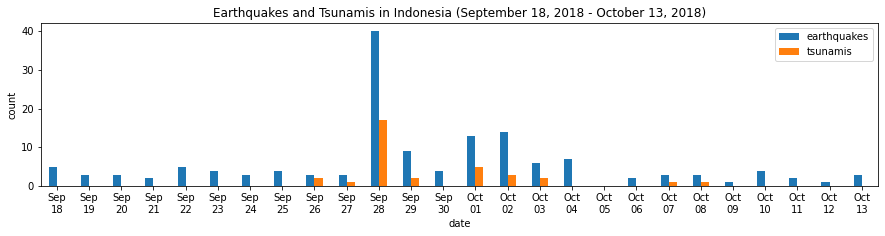

In [91]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)'
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')


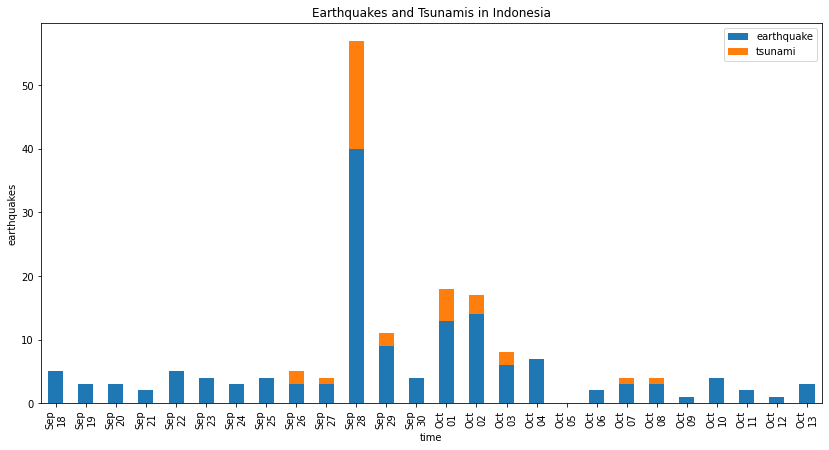

In [108]:
indonesia_quakes.plot.bar(
    y=['earthquake', 'tsunami'],
    stacked=True,  ylabel='earthquakes', 
    title='Earthquakes and Tsunamis in Indonesia', figsize = (14, 7))